# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name(s): Syed Abdullah Hassan, Andrea Heigl

Student number(s): 2411987, 2405304

## Description

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. **Each file consists one exercise type performed by single user.** Data are divided on multiple folders. Note that, **in each folder there is one long sequence of single exercise**, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br>
 Read raw data from the files. Prepare and **divide each data file to shorter sequences using windowing method**. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, **producing several example sequences from one exercise file for classification purposes**. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. **Each window** will consists **500x3 matrix of acceleration data** and **5x192 matrix of depth image data**.

</div>

In [2]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd

# Enter data folder location
loc = "/Users/andreaheigl/Multi-Modal-Physical-Exercise-Classification/MEx"
# loc = "/Users/abdullah/Desktop/studies/MMDF/project/Multi-Modal-Physical-Exercise-Classification/MEx"
print(loc)

/Users/andreaheigl/Multi-Modal-Physical-Exercise-Classification/MEx


In [3]:
"""
    IMPORTANT: PLEASE DO NOT MODIFY THE CODE IN THIS CELL.
"""
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)

    if meta["sensor"] == "acc":
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df

    records.append(meta)

df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head(10))
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,03,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...
1,03,04,2,act,acc,time acc_0 acc_1 acc_2 0 ...
2,03,06,1,act,acc,time acc_0 acc_1 acc_2 0 ...
3,03,04,1,act,acc,time acc_0 acc_1 acc_2 0 ...
4,03,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...
5,03,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
6,03,05,1,act,acc,time acc_0 acc_1 acc_2 0 ...
7,03,07,1,act,acc,time acc_0 acc_1 acc_2 0 ...
8,04,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
9,04,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...


Dataframe with one measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312


In [4]:
# check acceleration data

# filter just the rows with sensor 'acc'
acc_rows = df_records[df_records["sensor"] == "acc"].iloc[0]
display(df_records[df_records["sensor"] == "acc"]["df"].iloc[0]) # shows the part of df_records in which the sensor data is acc ( thigh and wrist accelerometer sensor)


# show the first 5 rows of the df
print("Erste Zeile mit 'acc':")
display(acc_rows["df"])

,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312
...,...,...,...,...
7951,79510.0,-0.754687,0.504687,-0.359375
7952,79520.0,-0.760938,0.510938,-0.359375
7953,79530.0,-0.754687,0.504687,-0.359375
7954,79540.0,-0.765625,0.510938,-0.359375


Erste Zeile mit 'acc':


,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312
...,...,...,...,...
7951,79510.0,-0.754687,0.504687,-0.359375
7952,79520.0,-0.760938,0.510938,-0.359375
7953,79530.0,-0.754687,0.504687,-0.359375
7954,79540.0,-0.765625,0.510938,-0.359375


In the code block above, we seperated the readings that were with the accelerometer in the variable callled acc_rows so that we can easily use the acc values.

In [5]:
"""
    IMPORTANT: PLEASE DO NOT MODIFY THE CODE IN THIS CELL.
"""

# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.

for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())

    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue

        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()

        records_windowed.append(tmp_data)

df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,03,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,03,02,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,03,02,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,03,02,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,03,02,1,act,acc,time acc_0 acc_1 acc_2 80...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312


In the code snippet below, we are trying to understand the two types of data and are visualizing them both seperately. 

It is important to understand the data. And how exactly was it collected. 

So just to make it easier to understand. When we say Acc we mean accelerometer sensor data from the sensor that was attached to the thigh and wrist. 

When we mention dc, we mean show five depth camera data frames within 2 seconds



## Table 1: Exercises

| Exercise Name               | Starting Position                                                                 | Action                                                                                                                                                                                                 |
|-----------------------------|-----------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Knee-rolling**            | Lying on back, knees together and bent, feet flat on floor                        | Slowly roll knees to the right, back to the centre, then to the left, keeping upper trunk still.                                                                                                       |
| **Bridging**                | Lying on back with knees bent and slightly apart, feet flat on floor and arms by side | Squeeze buttock muscles and lift hips off floor. Hold approximately 5-seconds and lower slowly.                                                                                                       |
| **Pelvic tilt**             | Lying on back with knees bent and slightly apart, feet flat on floor and arms by side | Tighten stomach muscles and press small of back against the floor, letting your bottom rise. Hold approximately 5 seconds then relax.                                                                  |
| **The Clam**                | Lying on right side with hips and shoulders in straight line. Bend knees so thighs are at 90 degrees angle. Rest head on top arm (stretched overhead or bent depending on comfort). Bend top arm and place hand on floor for stability. Stack hips directly on top of each other (same for shoulders). | Keep big toes together and slowly rotate leg in hip socket so the top knee opens. Open knee as far as you can without disturbing alignment of hips. Slowly return to starting position.                 |
| **Repeated Extension in Lying** | Lying face down, place palms on floor and elbows under shoulders (press-up position) | Straighten elbows as far as you can and push top half of body up as far as you can. Pelvis, hips and legs must stay relaxed. Maintain position for approximately 2-seconds then slowly lower to starting position. |
| **Prone punches**           | On all 4s with hands directly beneath shoulders, knees slightly apart and straight back. | Punch right arm in front and lower to floor. Repeat with left arm. Keep trunk as still as possible.                                                                                                    |
| **Superman**                | On all 4s with hands directly beneath shoulders, knees slightly apart and straight back. | Extend right arm straight in front of you and left leg straight behind you, keeping trunk as still as possible. Hold approximately 5-seconds then lower and repeat with other arm and leg.              |


This table has been taken from MEx: Multi-modal Exercises Dataset for Human Activity Recognition Research paper


Using this table, we were able to better understand what exactly is happening in each of the excercises. 

In [6]:
display(df_records_windowed[df_records_windowed["sensor"] == "dc"]["df"].iloc[0]) # shows the part of df_records_windowed in which the sensor data is dc (Depth Camera)
display(df_records_windowed[df_records_windowed["sensor"] == "acc"]["df"].iloc[0]) # shows the part of df_records_windowed in which the sensor data is acc ( thigh and wrist accelerometer sensor)

print("SHAPE DC:",df_records_windowed[df_records_windowed["sensor"] == "dc"]["df"].iloc[0].shape)
print("SHAPE ACC:",df_records_windowed[df_records_windowed["sensor"] == "acc"]["df"].iloc[0].shape)



,time,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,...,dc_182,dc_183,dc_184,dc_185,dc_186,dc_187,dc_188,dc_189,dc_190,dc_191
0,0.0,0.4589,0.9178,0.9257,0.921,0.921,0.9178,0.9149,0.9139,0.9116,...,0.9578,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397
1,1000.0,0.4605,0.9194,0.9249,0.921,0.921,0.9178,0.9139,0.9133,0.9122,...,0.9578,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397
2,2000.0,0.4605,0.9178,0.9249,0.921,0.921,0.9178,0.9139,0.9133,0.9116,...,0.9570,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397
3,3000.0,0.4589,0.9176,0.9241,0.921,0.921,0.9178,0.9139,0.9139,0.9116,...,0.9586,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397
4,4000.0,0.4605,0.9186,0.9249,0.921,0.921,0.9178,0.9139,0.9122,0.9122,...,0.9586,0.9531,0.9531,0.9531,0.9499,0.9499,0.9468,0.9468,0.9397,0.9397


,time,acc_0,acc_1,acc_2
0,0.0,-0.765625,0.484375,-0.375000
1,10.0,-0.765625,0.493750,-0.365625
2,20.0,-0.765625,0.490625,-0.368750
3,30.0,-0.765625,0.494792,-0.364583
4,40.0,-0.765625,0.489063,-0.370312
...,...,...,...,...
495,4950.0,-0.500000,0.796875,-0.234375
496,4960.0,-0.500000,0.796875,-0.234375
497,4970.0,-0.500000,0.812500,-0.234375
498,4980.0,-0.500000,0.796875,-0.234375


SHAPE DC: (5, 193)
SHAPE ACC: (500, 4)


<a id='task1'></a>
<div class=" alert alert-warning">
     
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>

</div>

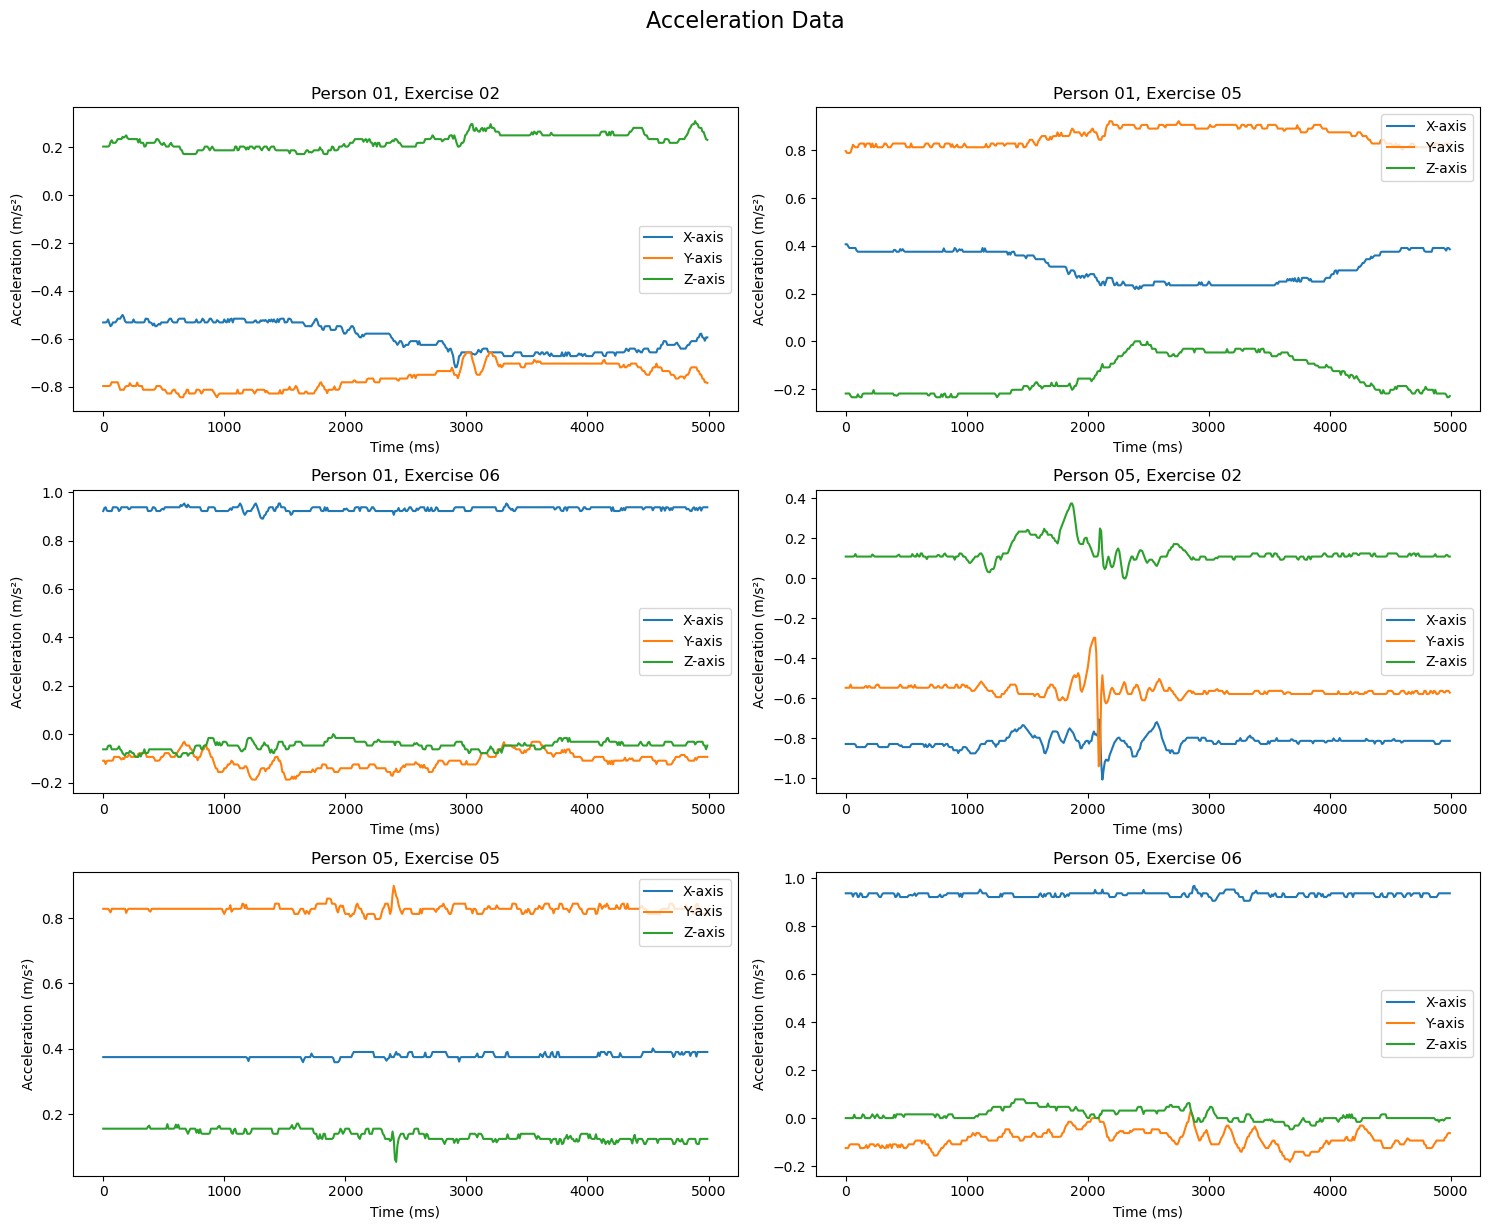

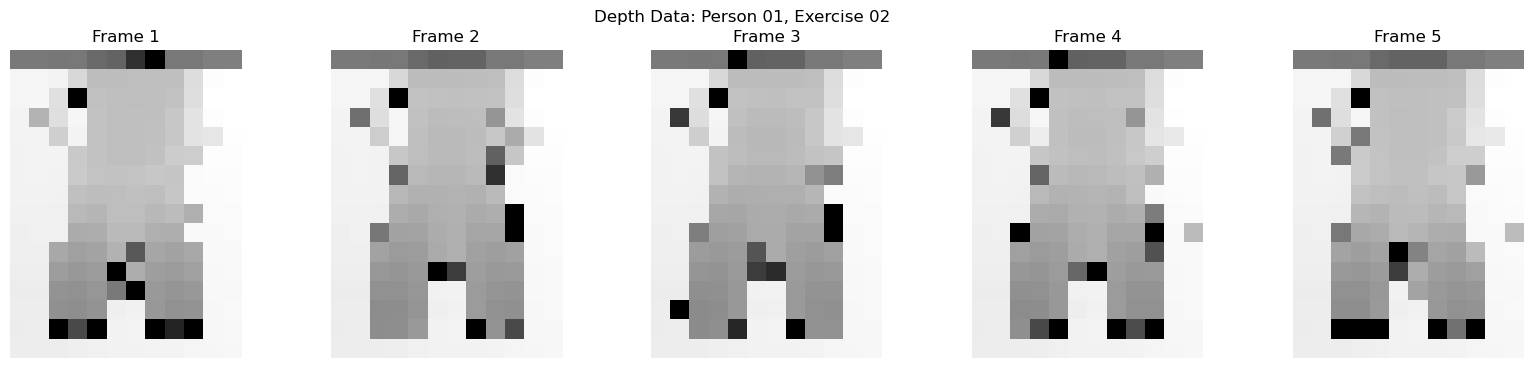

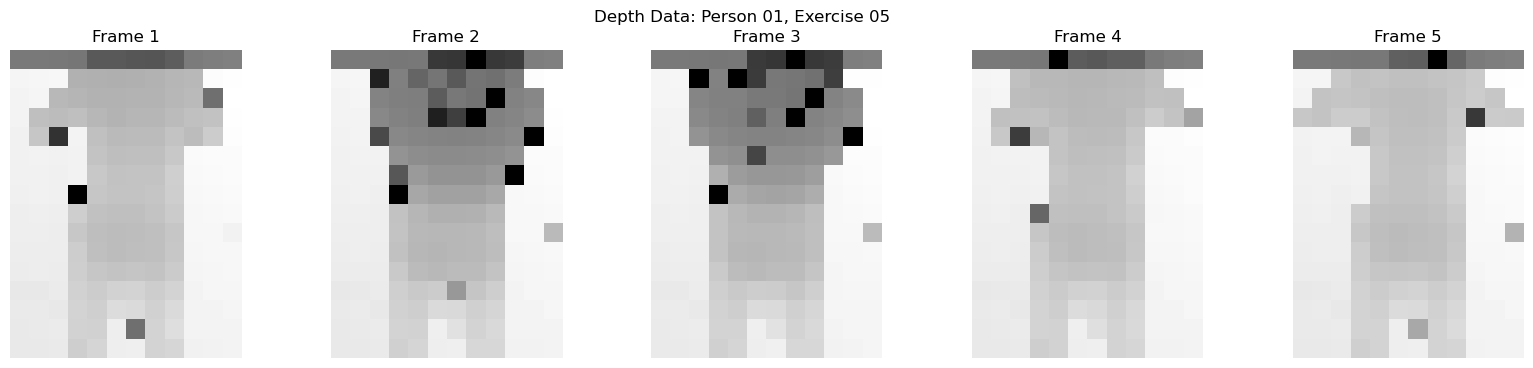

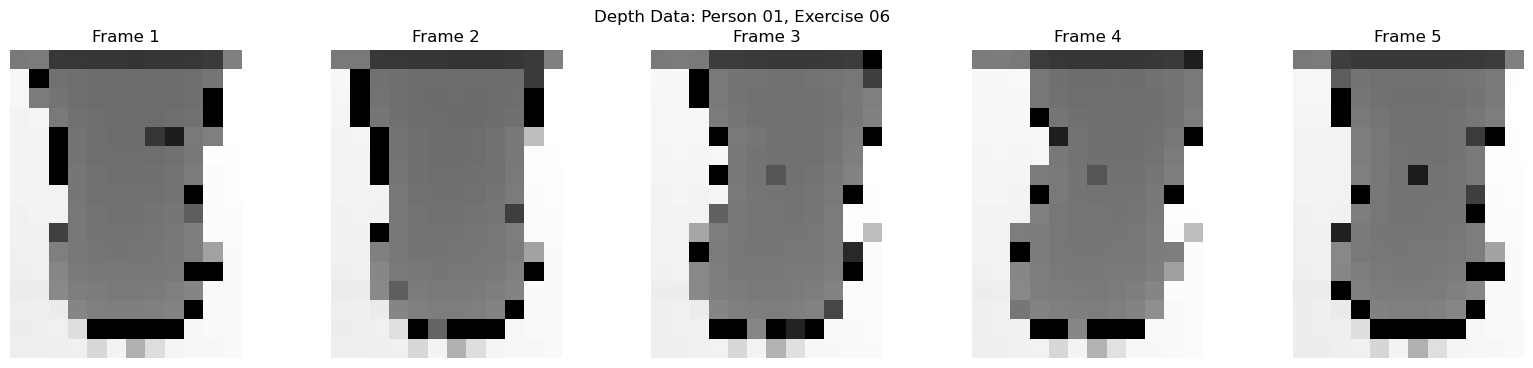

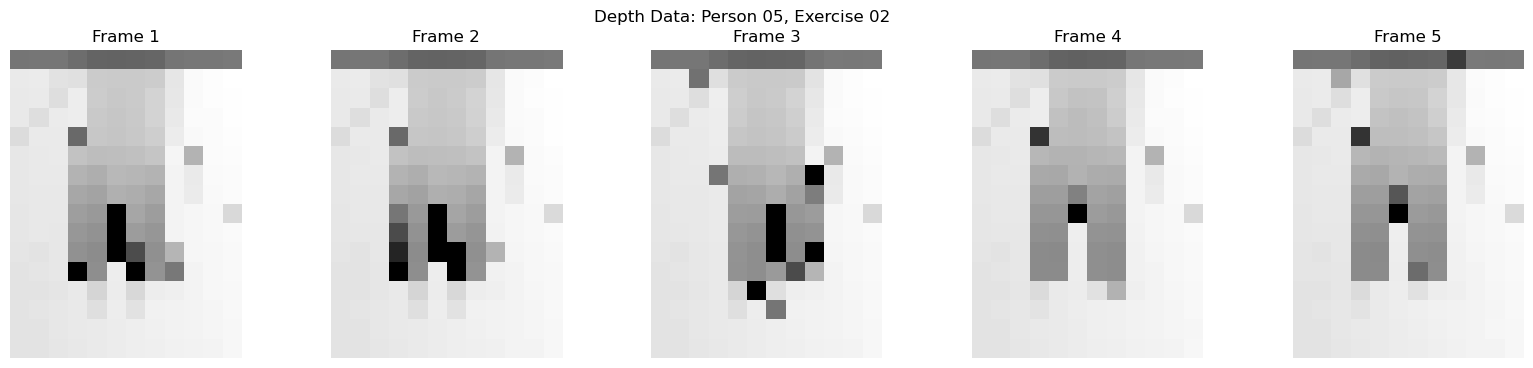

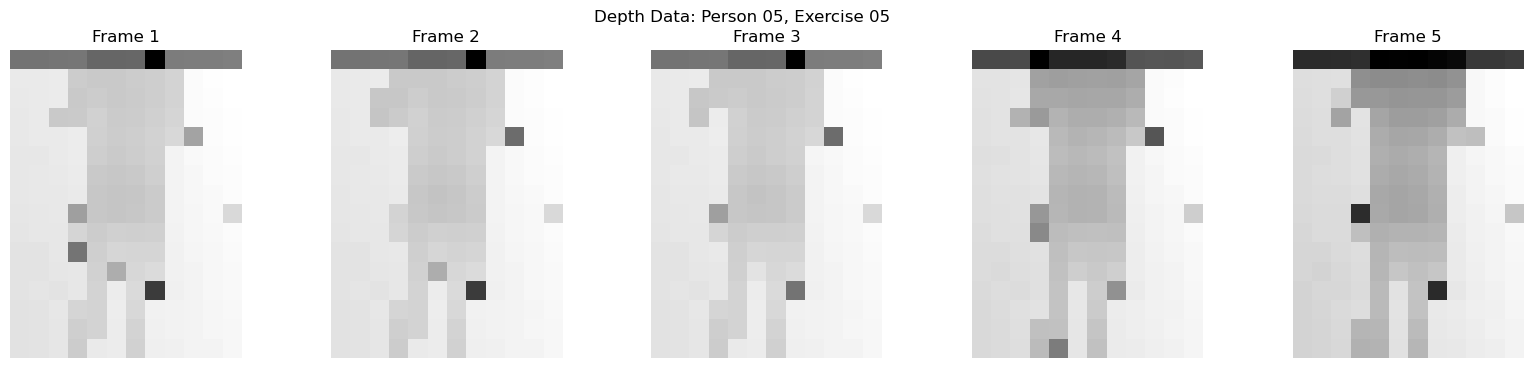

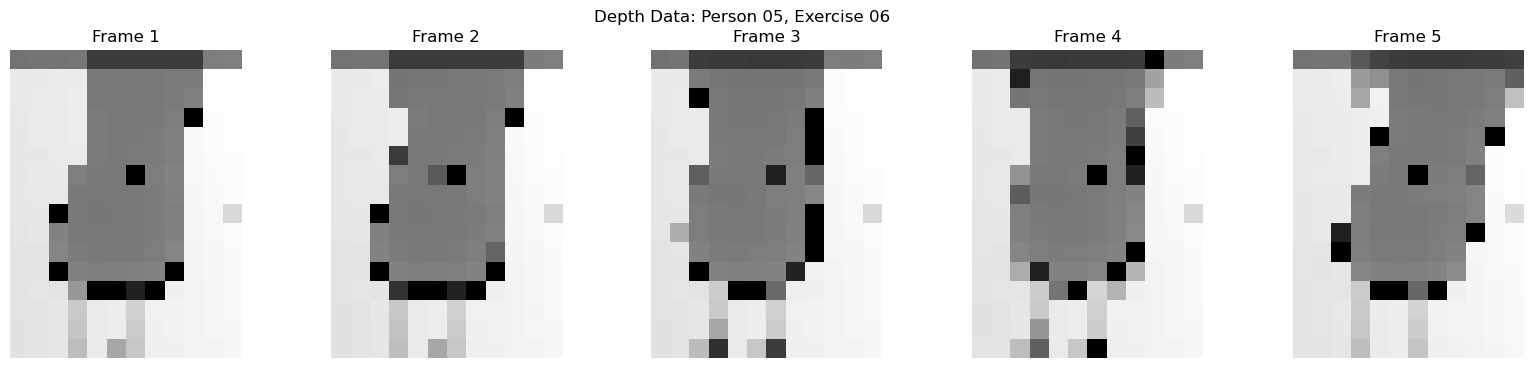

In [7]:
import matplotlib.pyplot as plt

# Select persons and exercises
persons = ["01", "05"]
exercises = ["02", "05", "06"]

# Initialize lists to store acceleration and depth data for all combinations
accel_plots = []
depth_plots = []

# Filter the relevant data from the DataFrame
for person in persons:
    for exercise in exercises:
        # Filter for person, exercise, and the first window
        filtered_data = df_records_windowed[
            (df_records_windowed["subject_id"] == person) &
            (df_records_windowed["exercise_id"] == exercise) &
            (df_records_windowed["window_idx"] == 0)
        ]

        if filtered_data.empty:
            print(f"No data found for Person {person}, Exercise {exercise}")
            continue

        # Retrieve data
        accel_data = filtered_data[filtered_data["sensor"] == "acc"]["df"].iloc[0] # Filtered data for acceleration and Depth Camera
        depth_data = filtered_data[filtered_data["sensor"] == "dc"]["df"].iloc[0]

        # Store acceleration data for later plotting
        accel_plots.append((person, exercise, accel_data))

        # Store depth data for later plotting
        depth_values = depth_data.iloc[:, 1:].to_numpy()  # All columns except "time"
        depth_plots.append((person, exercise, depth_values))

# Plot
num_accel_plots = len(accel_plots)
rows = (num_accel_plots + 1) // 2  # calc rows 
fig, axes = plt.subplots(rows, 2, figsize=(15, 4 * rows))  
fig.suptitle("Acceleration Data", fontsize=16, y=1.02)  

# Flatten axes if there's only one row
if rows == 1:
    axes = axes.reshape(1, -1)

# Plot  acceleration graph 
for idx, (person, exercise, accel_data) in enumerate(accel_plots):
    row = idx // 2  #  row index
    col = idx % 2   #  column index
    ax = axes[row, col]  #  subplot

    ax.plot(accel_data["time"], accel_data["acc_0"], label="X-axis")
    ax.plot(accel_data["time"], accel_data["acc_1"], label="Y-axis")
    ax.plot(accel_data["time"], accel_data["acc_2"], label="Z-axis")
    ax.set_title(f"Person {person}, Exercise {exercise}")
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Acceleration (m/s²)")
    ax.legend()


plt.tight_layout()
plt.show()

# Plot all depth data graphs together
for person, exercise, depth_values in depth_plots:
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, ax in enumerate(axes):
        if i >= depth_values.shape[0]:  # Ensure enough rows are available
            break
        depth_frame = depth_values[i, :].reshape(12, 16).T  # Reshape to 16x12
        ax.imshow(depth_frame, cmap="gray")
        ax.axis("off")
        ax.set_title(f"Frame {i+1}")
    plt.suptitle(f"Depth Data: Person {person}, Exercise {exercise}")
    plt.show()

<a id='task1'></a>
<div class=" alert alert-warning">

<b>1.2</b>
Split the prepared dataset to **training and testing datasets** so that data of **persons 1-7 are used for training** and data of **persons 8-10 are used for testing**. In next tasks, training dataset could be **further divided on (multiple) validation data folds** to tune the models parameters, when needed.<br>
    
Note: **Training set should have 1486 windows** and **testing set should have 598 windows**. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.
  
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In this part we were able to filter and get the same data frame size for the 2 sensor data values, the difficult part was to align and make sure that the window_idx, subject, &exercise are same for the two readings. So we came up with a function that turns these 3 keys and makes it into a unique id and uses that to align the data in both sides. This funtion was able to give us consistently aligned data on both sides.

Training Set Statistics:
Number of acceleration windows: 1486
Number of depth camera windows: 1486
Dimensions of acceleration data: (500, 4)
Dimensions of depth data: (5, 193)

Testing Set Statistics:
Number of acceleration windows: 598
Number of depth camera windows: 598
Dimensions of acceleration data: (500, 4)
Dimensions of depth data: (5, 193)
Visualizing Training Examples:
Training Example 1:


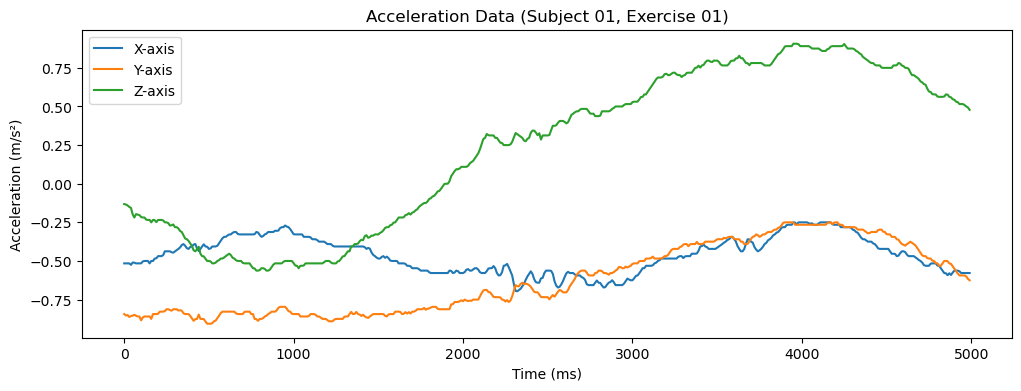

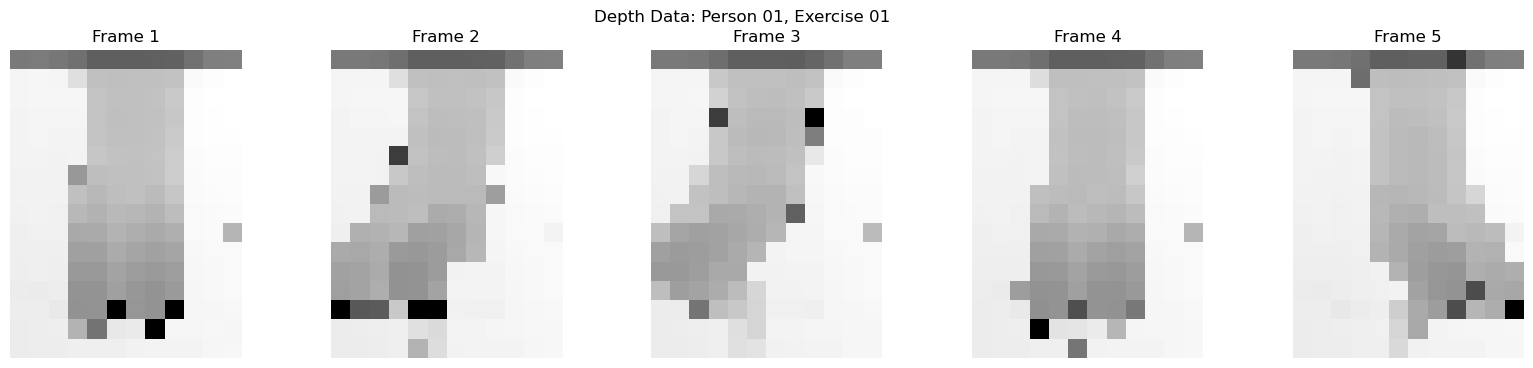

Training Example 2:


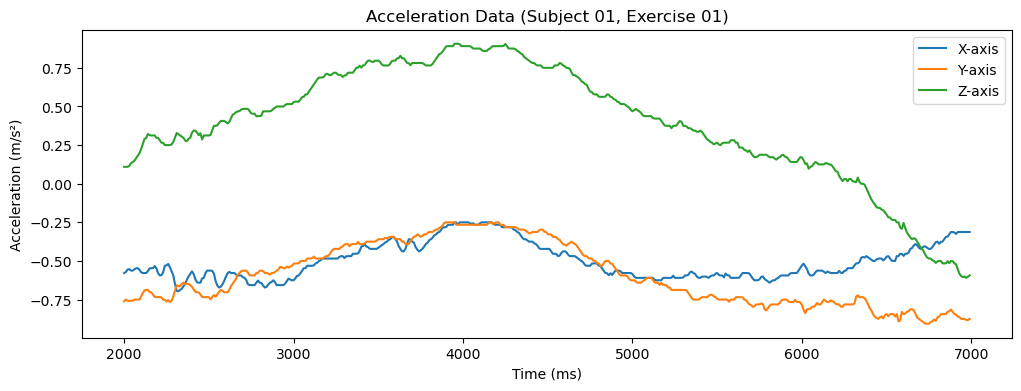

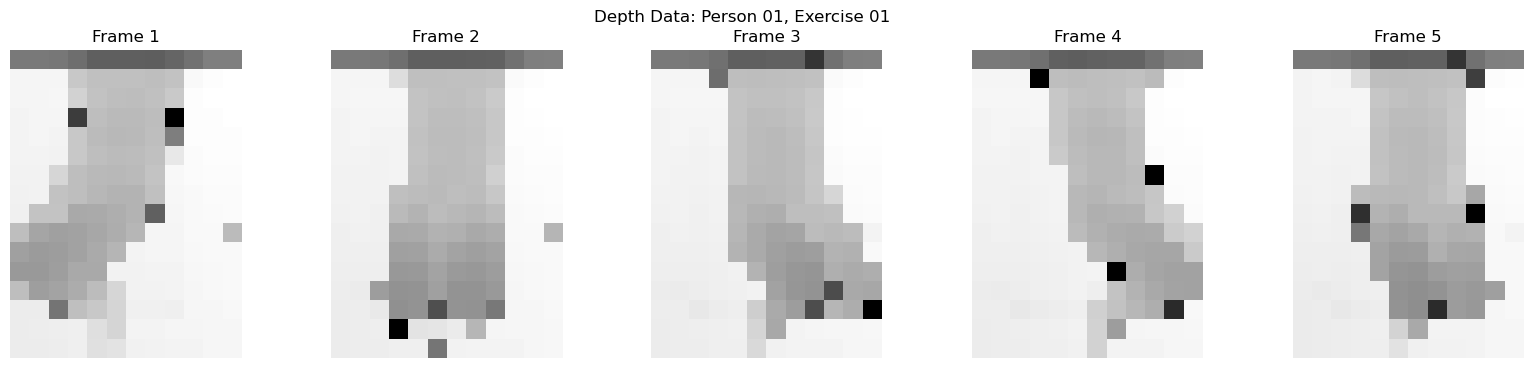

Training Example 3:


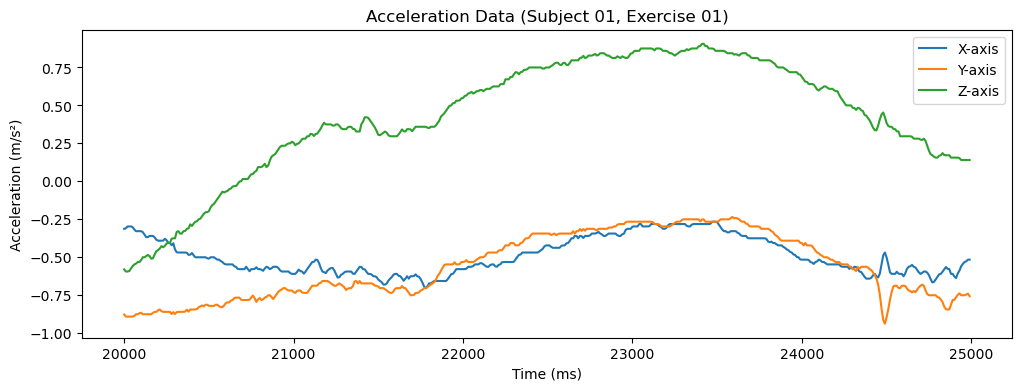

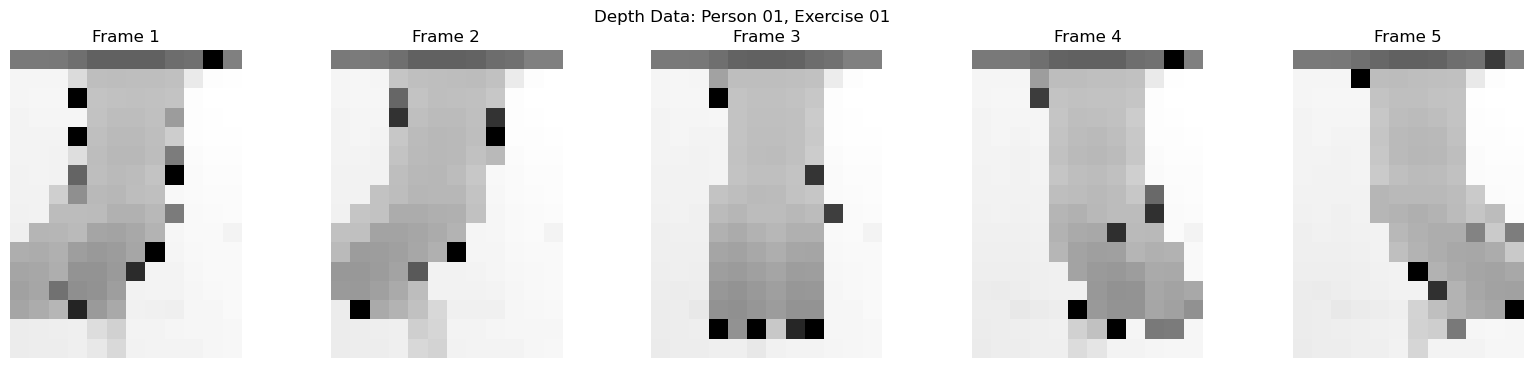

Training Example 4:


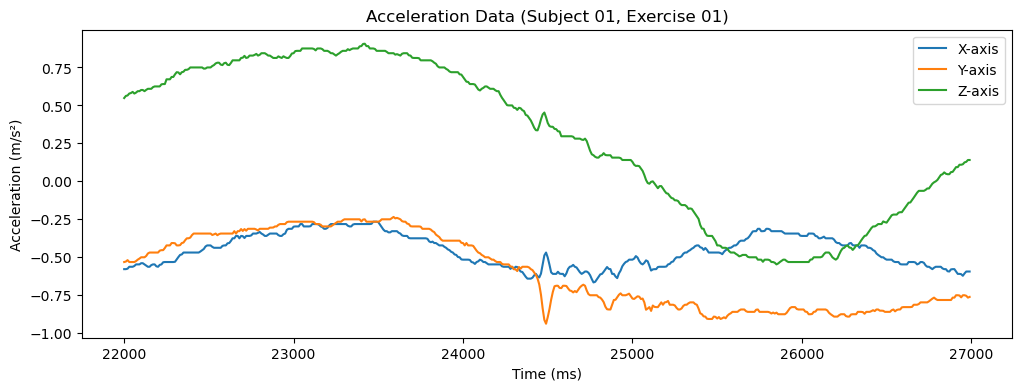

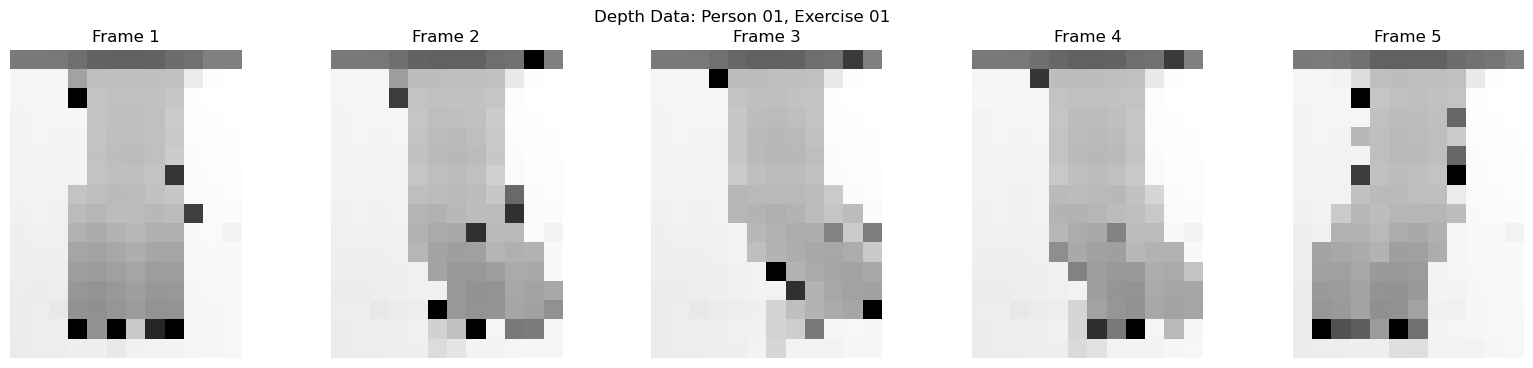

Training Example 5:


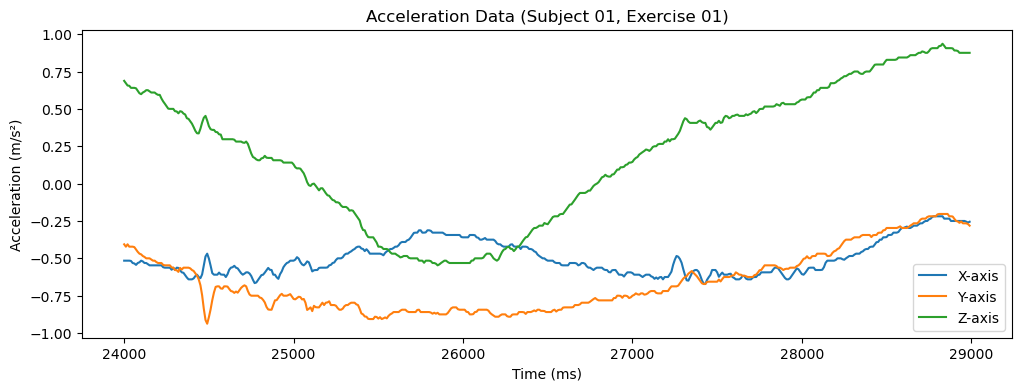

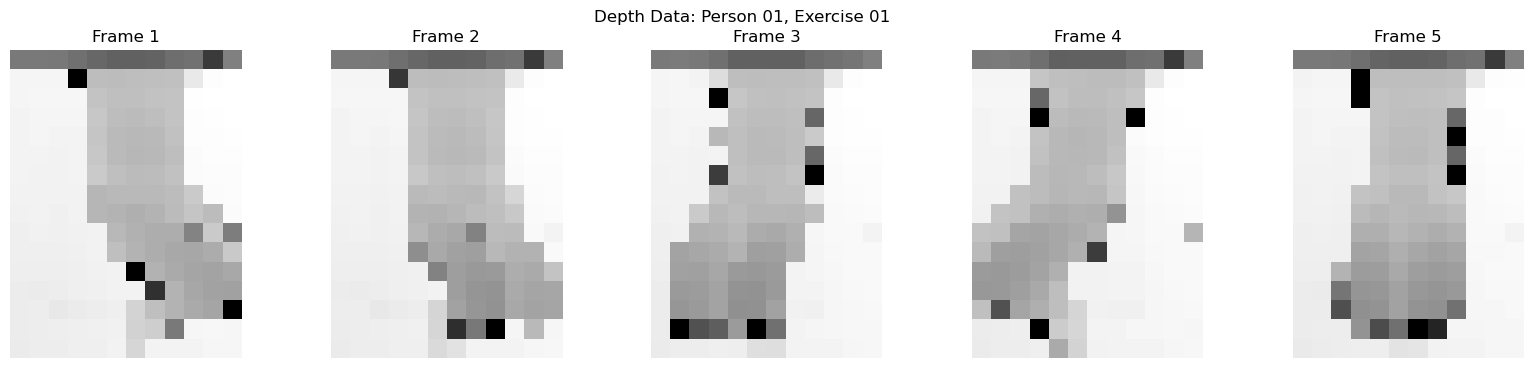


Visualizing Testing Examples:
Testing Example 1:


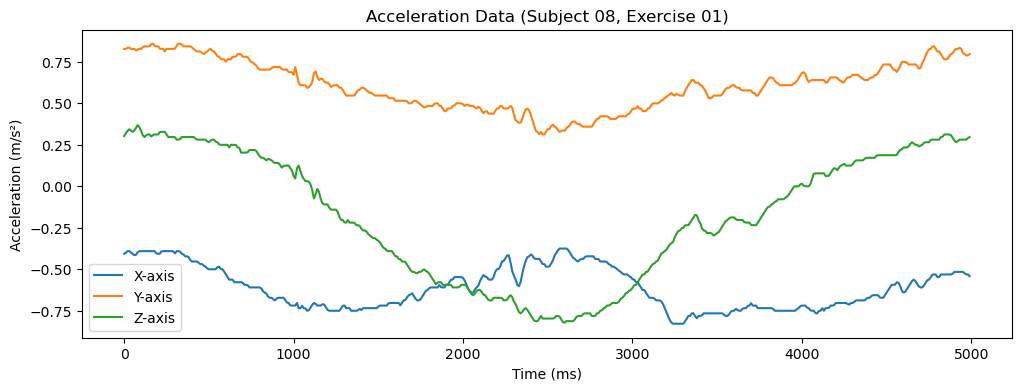

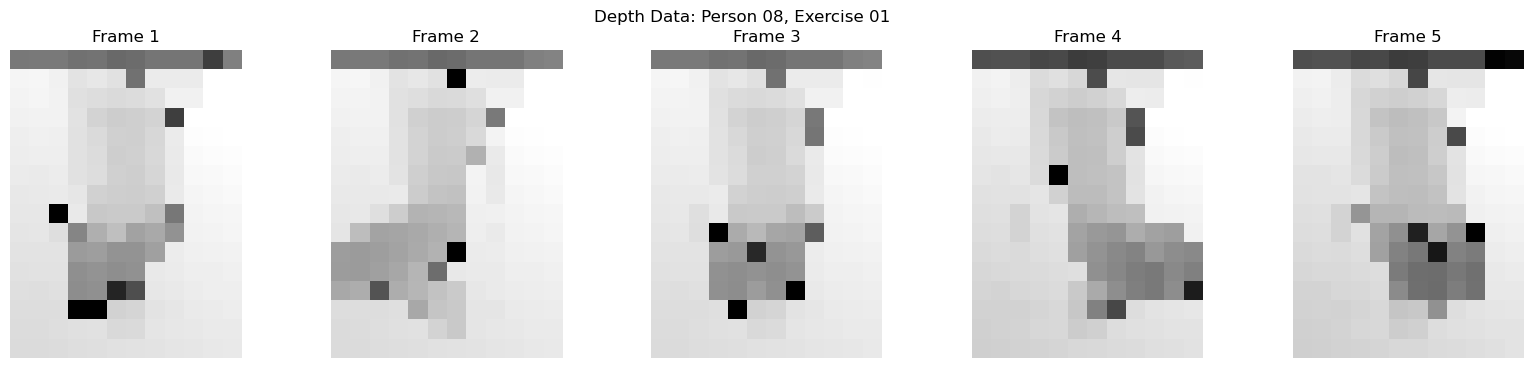

Testing Example 2:


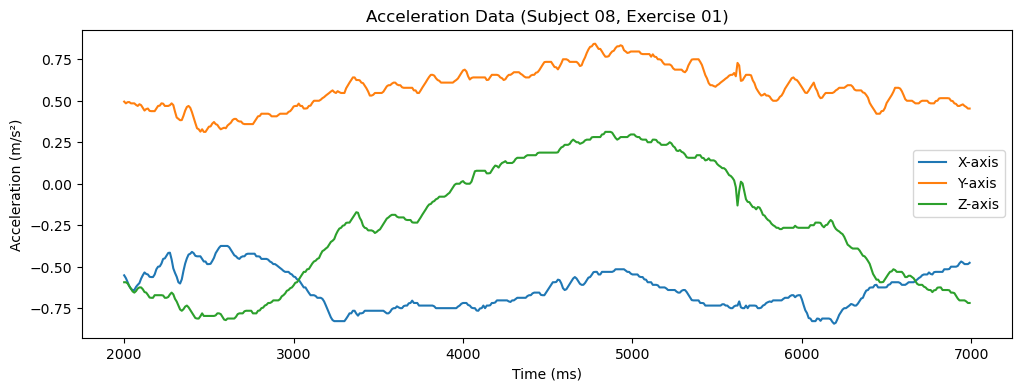

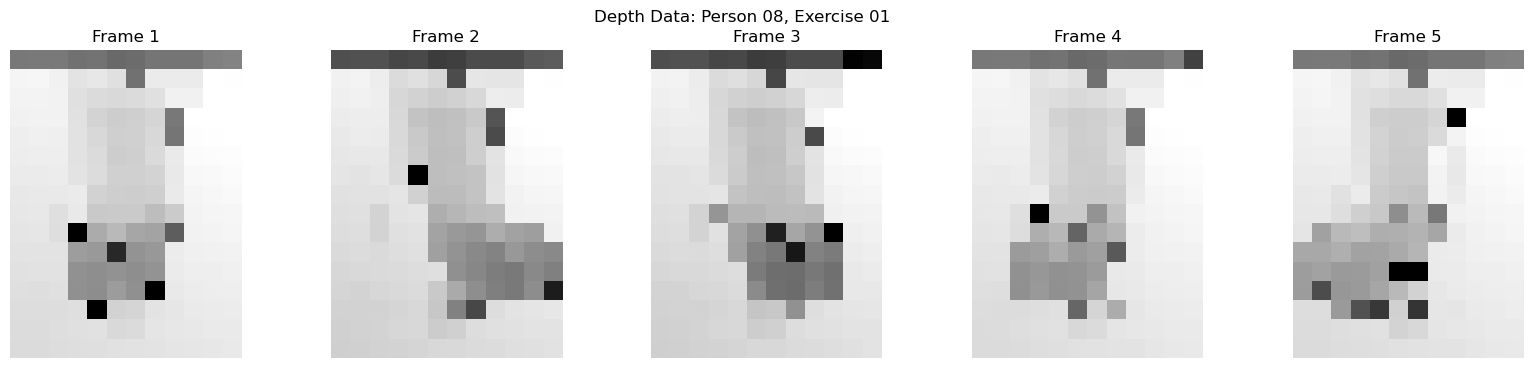

Testing Example 3:


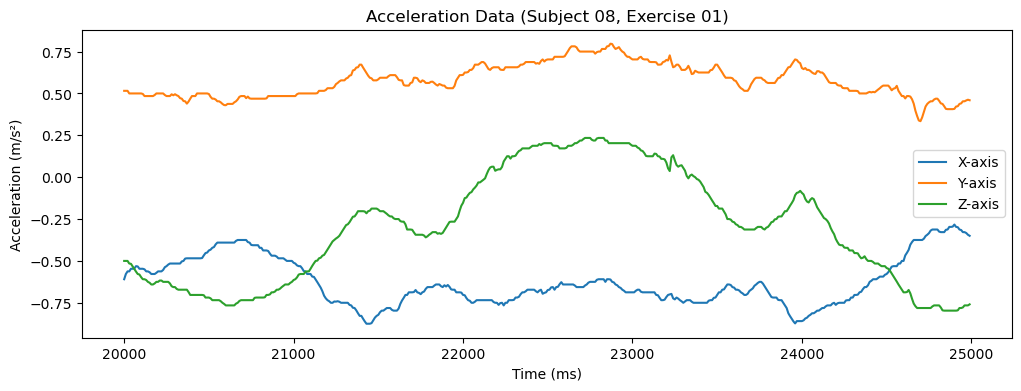

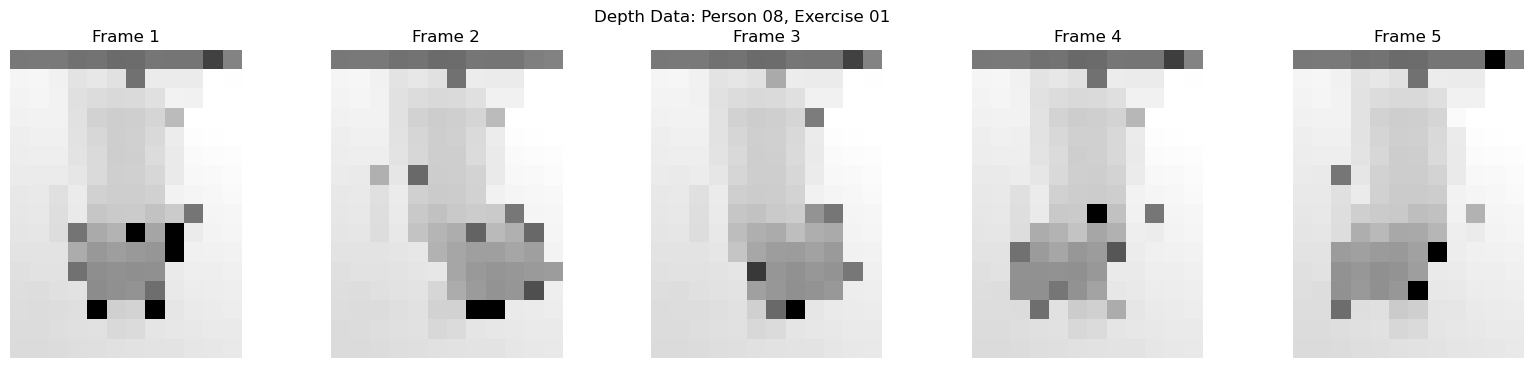

Testing Example 4:


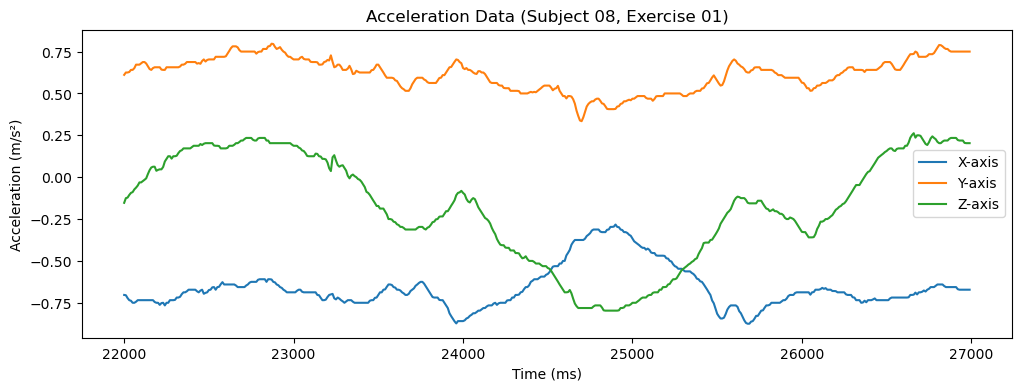

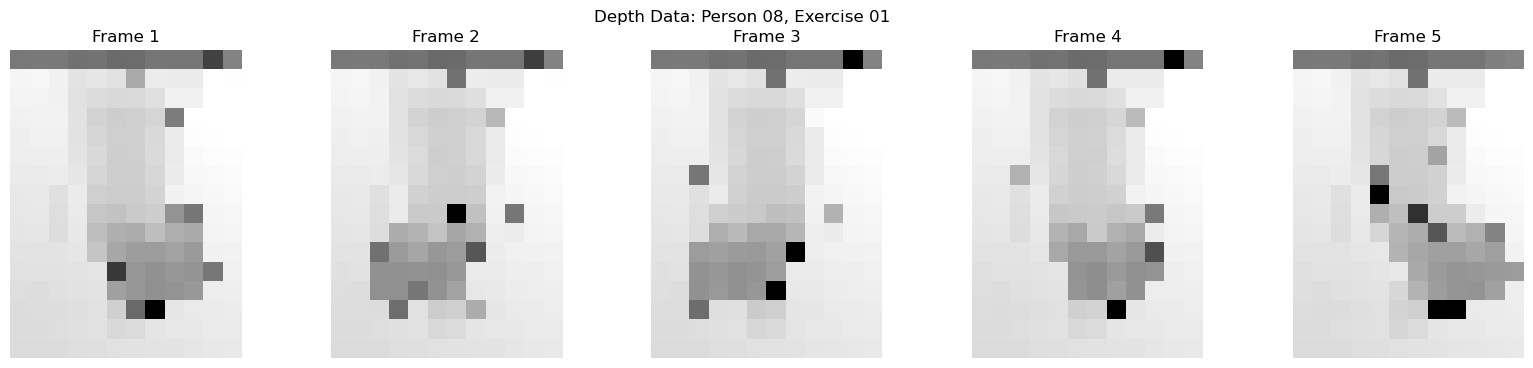

Testing Example 5:


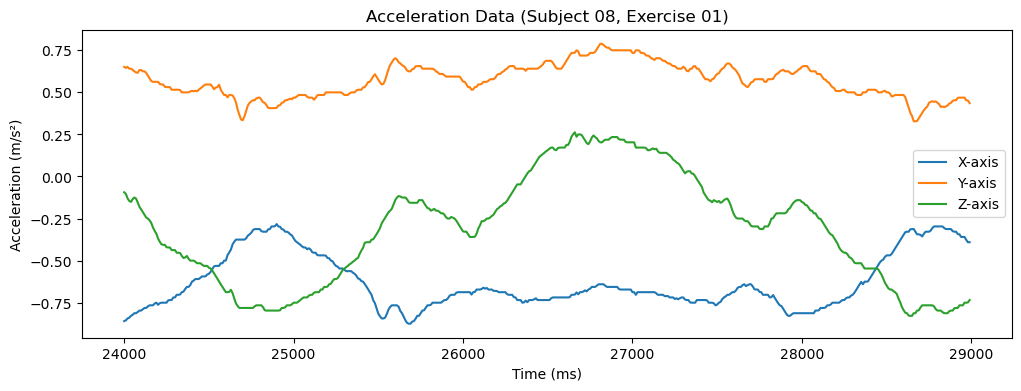

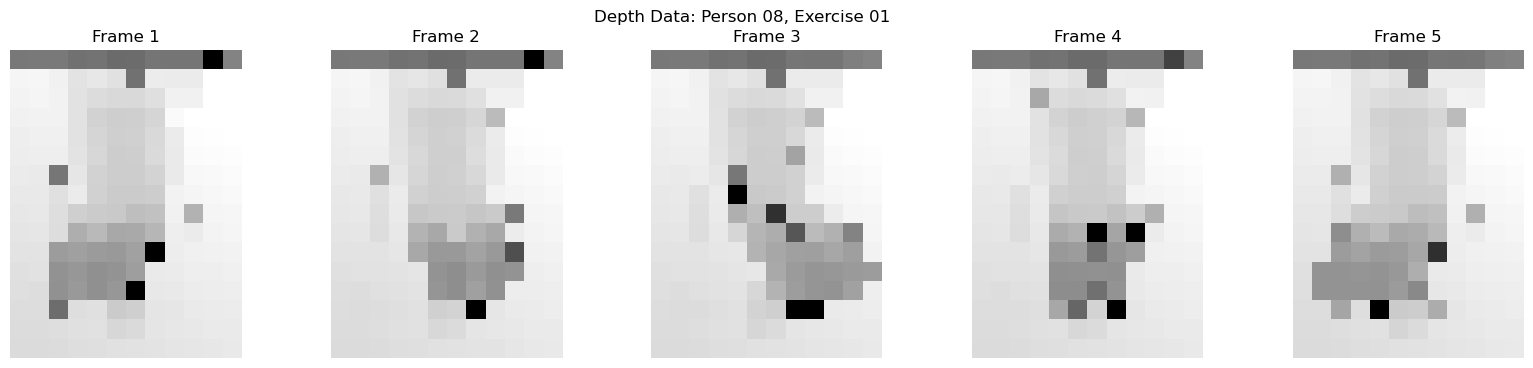

In [8]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



def plot_acceleration(data_row):
    """
    Plots acceleration data for a single window.
    
    Parameters:
    data_row (pd.Series): Row containing acceleration data with 'df' as the DataFrame
    """
    accel_data = data_row['df']
    plt.figure(figsize=(12, 4))
    plt.plot(accel_data['time'], accel_data['acc_0'], label='X-axis')
    plt.plot(accel_data['time'], accel_data['acc_1'], label='Y-axis')
    plt.plot(accel_data['time'], accel_data['acc_2'], label='Z-axis')
    plt.title(f"Acceleration Data (Subject {data_row['subject_id']}, Exercise {data_row['exercise_id']})")
    plt.xlabel('Time (ms)')
    plt.ylabel('Acceleration (m/s²)')
    plt.legend()
    plt.show()


def plot_depth(data_row):
    """
    Plots depth camera data for a single window as multiple frames.
    
    Parameters:
    data_row (pd.Series): Row containing depth camera data with 'df' as the DataFrame
    """
    depth_data = data_row['df']
    depth_values = depth_data.iloc[:, 1:].to_numpy()  # Exclude 'time' column

    # Ensure the data can be reshaped properly
    num_frames = depth_values.shape[0]  # Number of frames
    frame_size = 12 * 16  # Expected size per frame

    if depth_values.shape[1] != frame_size:
        print(f"Error: Depth data cannot be reshaped to (12, 16) for Subject {data_row['subject_id']}, Exercise {data_row['exercise_id']}")
        return

    # Reshape and visualize the frames
    fig, axes = plt.subplots(1, min(5, num_frames), figsize=(20, 4))
    for i, ax in enumerate(axes):
        if i >= num_frames:
            break
        depth_frame = depth_values[i, :].reshape(12, 16).T  # Reshape to 16x12 and transpose
        ax.imshow(depth_frame, cmap="gray")
        ax.axis("off")
        ax.set_title(f"Frame {i+1}")
    plt.suptitle(f"Depth Data: Person {data_row['subject_id']}, Exercise {data_row['exercise_id']}")
    plt.show()


def align_sensor_data(accel_data, depth_data):
    """
    Aligns acceleration and depth camera data based on subject_id, exercise_id, and window_idx.
    Drops rows that don't have matching data in both sensors.
    
    Parameters:
    accel_data (pd.DataFrame): DataFrame containing acceleration sensor data
    depth_data (pd.DataFrame): DataFrame containing depth camera data
    
    Returns:
    tuple: (aligned_accel, aligned_depth) - Pair of DataFrames with matching rows
    """
    # Create a unique identifier for each window
    def create_identifier(df):
        return df['subject_id'] + '_' + df['exercise_id'] + '_' + df['window_idx'].astype(str)
    
    # Add identifier column to both dataframes
    accel_data = accel_data.copy()
    depth_data = depth_data.copy()
    
    accel_data['identifier'] = create_identifier(accel_data)
    depth_data['identifier'] = create_identifier(depth_data)
    
    # Find common identifiers
    common_identifiers = set(accel_data['identifier']).intersection(set(depth_data['identifier']))
    
    # Filter both dataframes to keep only rows with matching data
    aligned_accel = accel_data[accel_data['identifier'].isin(common_identifiers)]
    aligned_depth = depth_data[depth_data['identifier'].isin(common_identifiers)]
    
    # Sort both dataframes by identifier to ensure they're aligned
    aligned_accel = aligned_accel.sort_values('identifier').reset_index(drop=True)
    aligned_depth = aligned_depth.sort_values('identifier').reset_index(drop=True)
    
    # Drop the temporary identifier column
    aligned_accel = aligned_accel.drop('identifier', axis=1)
    aligned_depth = aligned_depth.drop('identifier', axis=1)
    
    return aligned_accel, aligned_depth



# Step 1: Identify Training and Testing Subjects
train_subjects = ['01', '02', '03', '04', '05', '06', '07']
test_subjects = ['08', '09', '10']

# Step 2: Filter Training and Testing Data
train_data = df_records_windowed[df_records_windowed['subject_id'].isin(train_subjects)]
test_data = df_records_windowed[df_records_windowed['subject_id'].isin(test_subjects)]

train_grouped = train_data.groupby(['subject_id', 'exercise_id', 'window_idx'])
train_filtered = train_grouped.filter(lambda x: 'acc' in x['sensor'].values and 'dc' in x['sensor'].values)


train_accel = train_filtered[train_filtered['sensor'] == 'acc']
train_depth = train_filtered[train_filtered['sensor'] == 'dc']

train_accel, train_depth = align_sensor_data(train_accel, train_depth)

# print(train_accel.iloc[0])
# print(train_depth.iloc[0])




print("Training Set Statistics:")
print(f"Number of acceleration windows: {len(train_accel)}")
print(f"Number of depth camera windows: {len(train_depth)}")
print(f"Dimensions of acceleration data: {train_accel['df'].iloc[0].shape}")
print(f"Dimensions of depth data: {train_depth['df'].iloc[0].shape}")

# same thing for testing data 

test_grouped = test_data.groupby(['subject_id', 'exercise_id', 'window_idx'])
test_filtered = test_grouped.filter(lambda x: 'acc' in x['sensor'].values and 'dc' in x['sensor'].values)


test_accel = test_filtered[test_filtered['sensor'] == 'acc']
test_depth = test_filtered[test_filtered['sensor'] == 'dc']

test_accel, test_depth = align_sensor_data(test_accel, test_depth)

print("\nTesting Set Statistics:")
print(f"Number of acceleration windows: {len(test_accel)}")
print(f"Number of depth camera windows: {len(test_depth)}")
print(f"Dimensions of acceleration data: {test_accel['df'].iloc[0].shape}")
print(f"Dimensions of depth data: {test_depth['df'].iloc[0].shape}")

print("Visualizing Training Examples:")
for i in range(min(5, len(train_accel))):  # Ensure we don't exceed the data length
    print(f"Training Example {i+1}:")
    train_example_accel = train_accel.iloc[i]
    train_example_depth = train_depth.iloc[i]

    plot_acceleration(train_example_accel)
    plot_depth(train_example_depth)

# Visualize the first 30 testing examples
print("\nVisualizing Testing Examples:")
for i in range(min(5, len(test_accel))):  # Ensure we don't exceed the data length
    print(f"Testing Example {i+1}:")
    test_example_accel = test_accel.iloc[i]
    test_example_depth = test_depth.iloc[i]

    plot_acceleration(test_example_accel)
    plot_depth(test_example_depth)



# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>

Note: Standardize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes (The expected F1 score for this task should generally fall within the range of 40 to 50)
    
</div>

#### For task 2.1 here's a breakdown for the things that are needed to be done.

- Preprocessing Accelerometer Data by downsampling from 100 to 25 HZ, resultng in 125 x 3 matrix.
- Normalize data to have zero mean and unit variance
- Dimensionality Reduction with PCA with 5 comps on each axis (both trainig & testing data)
- LDA with 5 components on each axis 
- Concat PCA and LDA features into single vector: 3 x (5 + 5) 

- Training KNN classifier with k = 5 on the fused PCA and LDA features, Eval: predict labels for the test dataset using the classifier. 

## Evaluation
- confusion matrix 
- F1 score and classification report (precision, recall, F1 scores, and overall accuracy for each class)

Train Accel Processed Shape: (1486, 125, 3)
Test Accel Processed Shape: (598, 125, 3)
Train Transformed Shape: (1486, 30)
Test Transformed Shape: (598, 30)


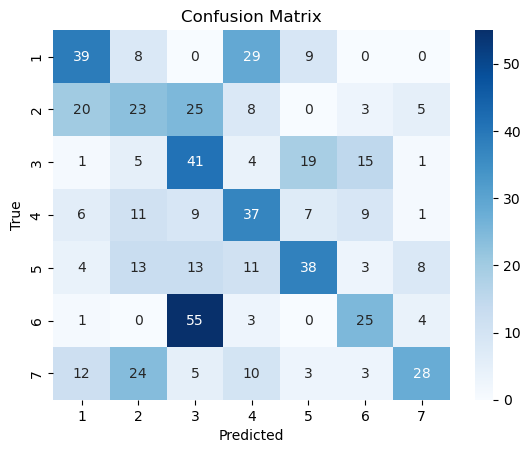

Classification Report:
               precision    recall  f1-score   support

           1       0.47      0.46      0.46        85
           2       0.27      0.27      0.27        84
           3       0.28      0.48      0.35        86
           4       0.36      0.46      0.41        80
           5       0.50      0.42      0.46        90
           6       0.43      0.28      0.34        88
           7       0.60      0.33      0.42        85

    accuracy                           0.39       598
   macro avg       0.42      0.39      0.39       598
weighted avg       0.42      0.39      0.39       598



In [178]:
# 2.1

### Your code begins here ###
from scipy.signal import resample
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# preprocess acceleration data
def preprocess_accel_data(data): 
    """
    Resample and standardize accelerometer data.
    
    Parameters:
    data (pd.DataFrame): DataFrame containing acceleration data with 'df' column.

    Returns:
    np.ndarray: Resampled and standardized data of shape (n_samples, 125, 3).
    """
    processed_data = []
    for row in data['df']:
        # Resample to 125 timesteps
        resampled = resample(row[['acc_0', 'acc_1', 'acc_2']].values, 125, axis=0)
        
        # Standardize the data along each axis (X, Y, Z)
        scaler = StandardScaler()
        standardized = scaler.fit_transform(resampled)
        
        processed_data.append(standardized)
    
    return np.array(processed_data)

# preprocess train and test data
train_accel_processed = preprocess_accel_data(train_accel)
test_accel_processed = preprocess_accel_data(test_accel)

# print(train_accel_processed[0])

# check result
print(f"Train Accel Processed Shape: {train_accel_processed.shape}")  # (n_samples, 125, 3)
print(f"Test Accel Processed Shape: {test_accel_processed.shape}")    # (n_samples, 125, 3)



def apply_pca_lda(train_data, test_data, labels, n_components=5):
    """
    Apply PCA and LDA to reduce dimensionality of accelerometer data.

    Parameters:
    train_data (np.ndarray): Preprocessed training data of shape (n_samples, 125, 3).
    test_data (np.ndarray): Preprocessed test data of shape (n_samples, 125, 3).
    labels (np.ndarray): Labels corresponding to training data.
    n_components (int): Number of components for PCA and LDA.

    Returns:
    tuple: Transformed train and test data of shape (n_samples, 30).
    """
    train_transformed = []
    test_transformed = []
    
    for axis in range(3):  # Process each axis separately (X, Y, Z)
        # Apply PCA
        pca = PCA(n_components=n_components)
        train_pca = pca.fit_transform(train_data[:, :, axis])
        test_pca = pca.transform(test_data[:, :, axis])
        
        # Apply LDA
        lda = LDA(n_components=n_components)
        train_lda = lda.fit_transform(train_data[:, :, axis], labels)
        test_lda = lda.transform(test_data[:, :, axis])
        
        # Concatenate PCA and LDA results
        train_transformed.append(np.hstack((train_pca, train_lda)))
        test_transformed.append(np.hstack((test_pca, test_lda)))
    
    # Combine all axes
    train_final = np.hstack(train_transformed)
    test_final = np.hstack(test_transformed)
    
    return train_final, test_final

# lables for train data
train_labels = train_accel['exercise_id'].astype(int)

# appply transformation
train_transformed, test_transformed = apply_pca_lda(train_accel_processed, test_accel_processed, train_labels)

# check results
print(f"Train Transformed Shape: {train_transformed.shape}")  # (n_samples, 30)
print(f"Test Transformed Shape: {test_transformed.shape}")    # (n_samples, 30)



# train kNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_transformed, train_labels)

# predictions on test data
test_labels = test_accel['exercise_id'].astype(int)
test_predictions = knn.predict(test_transformed)

# confusion matrix
cm = confusion_matrix(test_labels, test_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# F1-Score
report = classification_report(test_labels, test_predictions)
print("Classification Report:\n", report)

### Your code ends here ###

The results are not so good. The F1 scores are falling under 40. Maybe we should look at all the steps carried out and see if they can be improved. 

<a id='task2'></a>
<div class=" alert alert-warning">
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>

Note: Standardize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes (The expected F1 score for this task should generally fall within the range of 40 to 50)
    
</div>

#### Depth Img Data

Preprocess Depth Image Data by flattening each 12× 16 12×16 depth matrix into a 192-dimensional vector.

Normalize data to have zero mean and unit variance.

Dimensionality Reduction with PCA (5 components) on the entire dataset (training & testing).

LDA with 5 components using training labels.

Concatenate PCA and LDA features into a single vector: 
5
+
5
=
10
5+5=10.

Train kNN classifier with 
𝑘
=
1
k=1 on the fused PCA and LDA features.

Evaluate: predict labels for the test dataset using the trained classifier.

Evaluation
Confusion matrix.
F1 score and classification report (precision, recall, F1 scores, and overall accuracy for each class).


Confusion Matrix:
[[56 12  7  0  7  1  2]
 [47 36  1  0  0  0  0]
 [61 25  0  0  0  0  0]
 [45 12  2 19  0  2  0]
 [43  0  0  2 45  0  0]
 [ 0  0  0  0  0 34 54]
 [ 0  0  0  1  1  4 79]]

Classification Report:
              precision    recall  f1-score   support

           1     0.2222    0.6588    0.3323        85
           2     0.4235    0.4286    0.4260        84
           3     0.0000    0.0000    0.0000        86
           4     0.8636    0.2375    0.3725        80
           5     0.8491    0.5000    0.6294        90
           6     0.8293    0.3864    0.5271        88
           7     0.5852    0.9294    0.7182        85

    accuracy                         0.4498       598
   macro avg     0.5390    0.4487    0.4294       598
weighted avg     0.5396    0.4498    0.4313       598



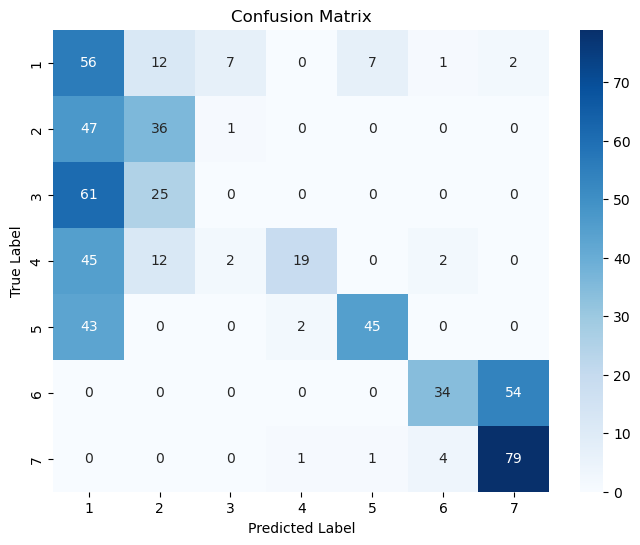

In [179]:
# 2.2

### Your code begins here ###

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# --- 1. preprocessing of depth image data ---
# Reshape depth data (12x16) to 192-dimensional vectors
def preprocess_depth_data(depth_df):
    # Flatten each depth matrix to a vector and stack them
    return np.stack(depth_df['df'].apply(lambda x: x.to_numpy().flatten()).values)

# train and test dat
train_depth_data = preprocess_depth_data(train_depth)
test_depth_data = preprocess_depth_data(test_depth)

# standardize data (zero mean & unit variance)
scaler = StandardScaler()
train_depth_std = scaler.fit_transform(train_depth_data)
test_depth_std = scaler.transform(test_depth_data)

# labels for train and test data
train_labels = train_depth['exercise_id'].astype(int)
test_labels = test_depth['exercise_id'].astype(int)

# --- Part 2 apply PCA & LDA  ---
# PCA
pca = PCA(n_components=5)
train_pca = pca.fit_transform(train_depth_std)
test_pca = pca.transform(test_depth_std)

# LDA
lda = LDA(n_components=5)
train_lda = lda.fit_transform(train_depth_std, train_labels)
test_lda = lda.transform(test_depth_std)

# --- 3. combine features (fusion) ---
# fusion PCA and LDA features
train_fused = np.concatenate((train_pca, train_lda), axis=1)
test_fused = np.concatenate((test_pca, test_lda), axis=1)

# --- 4. classification with NN ---
# K-Nearest Neighbors Classifier
nn_classifier = KNeighborsClassifier(n_neighbors=1)
nn_classifier.fit(train_fused, train_labels)

# prediction
predictions = nn_classifier.predict(test_fused)

# --- 5. evaluation ---
# confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# F1 score & statistics
report = classification_report(test_labels, predictions, digits=4)
print("\nClassification Report:")
print(report)

# confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Your code ends here ###

There seems to be something glaring at us, class 3 has f1 score of 0. Is it because we did somethng wrong, or is the PCA/LDA problematic. Is the data aligned wrong? 

# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   

<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>

Document your work.
    
</div>

In [29]:
# 3.1

### Your code begins here ###

# Verwende die Preprocessing-Ergebnisse von Task 2.1
# train_accel_processed und test_accel_processed haben die Shape (n_samples, 125, 3)

# 1. PCA-Anwendung
train_accel_flat = train_accel_processed.reshape(train_accel_processed.shape[0], -1)  # (n_samples, 375)
test_accel_flat = test_accel_processed.reshape(test_accel_processed.shape[0], -1)    # (n_samples, 375)

pca = PCA(n_components=10)  # 10 größte Hauptkomponenten
train_pca_features = pca.fit_transform(train_accel_flat)  # Shape: (n_samples, 10)
test_pca_features = pca.transform(test_accel_flat)        # Shape: (n_samples, 10)

# 2. Statistische Features (Mittelwert und Standardabweichung pro Achse)
train_means = np.mean(train_accel_processed, axis=1)  # Shape: (n_samples, 3)
train_stds = np.std(train_accel_processed, axis=1)    # Shape: (n_samples, 3)
train_stat_features = np.hstack([train_means, train_stds])  # Shape: (n_samples, 6)

test_means = np.mean(test_accel_processed, axis=1)    # Shape: (n_samples, 3)
test_stds = np.std(test_accel_processed, axis=1)      # Shape: (n_samples, 3)
test_stat_features = np.hstack([test_means, test_stds])  # Shape: (n_samples, 6)

# 3. Kombinierte Features
train_combined_features = np.hstack([train_pca_features, train_stat_features])  # Shape: (n_samples, 36)
test_combined_features = np.hstack([test_pca_features, test_stat_features])    # Shape: (n_samples, 36)

# Ergebnisse prüfen
print(f"Train Combined Features Shape: {train_combined_features.shape}")
print(f"Test Combined Features Shape: {test_combined_features.shape}")

### Your code ends here ###

Train Combined Features Shape: (1486, 16)
Test Combined Features Shape: (598, 16)


<a id='task3'></a>
<div class=" alert alert-warning">

<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>

Document your work.
    
</div>

In [36]:
# 3.2

### Your code begins here ###

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- 1. preprocessing of depth image data ---
def preprocess_depth_data(depth_df):
    """
    Preprocess depth images by flattening them into vectors.
    
    Parameters:
    depth_df (pd.DataFrame): DataFrame containing depth images with 'df' column.
    
    Returns:
    np.ndarray: Flattened and standardized depth images.
    """
    # Flatten each depth matrix to a vector and stack them
    return np.stack(depth_df['df'].apply(lambda x: x.to_numpy().flatten()).values)

# Preprocess train and test depth data
train_depth_data = preprocess_depth_data(train_depth)  # (n_samples, 192)
test_depth_data = preprocess_depth_data(test_depth)    # (n_samples, 192)

# Standardize the depth data
scaler = StandardScaler()
train_depth_std = scaler.fit_transform(train_depth_data)  # Zero mean and unit variance
test_depth_std = scaler.transform(test_depth_data)

# --- 2. Apply PCA ---
# PCA with 10 components
pca = PCA(n_components=10)
train_pca = pca.fit_transform(train_depth_std)  # (n_samples, 10)
test_pca = pca.transform(test_depth_std)        # (n_samples, 10)


# calculate the maximum number of sequences
n_sequences_train = train_pca.shape[0] // 5  # 297 sequences
n_sequences_test = test_pca.shape[0] // 5

# trim frames to a multiple of 5
train_pca = train_pca[:n_sequences_train * 5]  # 1485 Frames
test_pca = test_pca[:n_sequences_test * 5]

# reshape to 5-frame squences (5*10 = 50 features per sequence)
train_pca_seq = train_pca.reshape(n_sequences_train, 5 * 10)  # (297, 50)
test_pca_seq = test_pca.reshape(n_sequences_test, 5 * 10)

# check shapes
print(f"Train PCA Features Shape: {train_pca_seq.shape}")  # (297, 50)
print(f"Test PCA Features Shape: {test_pca_seq.shape}")



### Your code ends here ###

Train PCA Features Shape: (297, 50)
Test PCA Features Shape: (119, 50)


In [35]:
print(train_pca.shape)

(1485, 10)


<a id='task3'></a>
<div class=" alert alert-warning">

<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>

Note: Normalize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes. (The expected F1 score for this task should generally fall within the range of 55 to 70)
    
</div>

In [45]:
# 3.3

### Your code begins here ###

### Your code ends here ###

Train Combined Sequence Shape: (297, 80)
Test Combined Sequence Shape: (119, 80)
Train Combined Features Shape: (297, 130)
Test Combined Features Shape: (119, 130)
Train Combined Normalized Shape: (297, 130)
Test Combined Normalized Shape: (119, 130)


AttributeError: 'Series' object has no attribute 'reshape'

In [41]:
print(f"Shape of train_combined_features: {train_combined_features.shape}")


Shape of train_combined_features: (1486, 16)


# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br>
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0).
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$.<br>
Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>

Note: Normalize the data along each axis.
<br>

Document your work, answer the given question, evaluate the results, and analyse the outcomes.
    
</div>

In [64]:
# 4.1

### Your code begins here ###

### Your code ends here ###

<a id='task4'></a>
<div class=" alert alert-warning">


<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
Document your work, evaluate the results, and analyse the outcomes.
    
</div>

In [65]:
# 4.2

### Your code begins here ###

### Your code ends here ###

<a id='task4'></a>
<div class=" alert alert-warning">
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes.
    
</div>

In [66]:
# 4.3

### Your code begins here ###

### Your code ends here ###

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br>
<br>
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br>
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [67]:
# 5.1

### Your code begins here ###

### Your code ends here ###

<a id='task5'></a>
<div class=" alert alert-warning">

<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [68]:
# 5.2

### Your code begins here ###

### Your code ends here ###